Connect to Google Sheets API

In [16]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# authorize the API client with the credentials
client = gspread.oauth()

# open the Google Sheets document by its URL or ID
sheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1eIdupjcWapVGPNMNTeKbnaPIroOXP6taFhrDMn5z3D4/edit#gid=1888658763')
# alternatively, you can open by the sheet ID only: client.open_by_key('your_sheet_id')

# get the worksheet by its name or index
worksheet = sheet.worksheet('2023_01_13_relative_5_1')
# alternatively, you can get by index: sheet.get_worksheet(0)

# fetch the data from the worksheet as a list of lists
data = worksheet.get_all_values()

mods = sheet.worksheet("Mods").get_all_values()

cmt3raw = sheet.worksheet("CMT3").get_all_values()
suvraw = sheet.worksheet("SUV").get_all_values() 

In [17]:
import numpy as np

headers, wt = data[0], data[1:]
mods_headers, mod = mods[0], mods[1:]
cmt3_headers, cmt3 = cmt3raw[0], cmt3raw[1:]
suv_headers, suv = suvraw[0], suvraw[1:]

wt = np.array(wt, dtype=np.float32)
mod = np.array(mod, dtype=np.float32)
cmt3 = np.array(cmt3, dtype=np.float32)
suv = np.array(suv, dtype=np.float32)


u = [i for i in range(-500, 0, 5)]
g=  [i for i in range(0, 1000, 10)]
d = [i for i in range(1000, 1500, 5)]

x = u + g + d

obs = wt[:, headers.index('Observed Steady State Methylation')]
pred = wt[:, headers.index('Predicted Steady State Methylation')]
alpha = wt[:, headers.index('Alpha')]
beta = wt[:, headers.index('Beta')]
cg = wt[:, headers.index('CG Distribution')]
cg_density = cg / 60000 # TODO
h2az = mod[:, mods_headers.index('H2AZ')]
h2az_compressed = [sum(h2az[i:i+10]) for i in range(0, len(h2az), 10)]

In [18]:
from matplotlib import pyplot as plt
# from matplotlib import font_manager

# # font_path = font_manager.findfont('Calibri')
# # plt.rcParams.update({'font.family': 'Calibri',
# #                      'font.size': 12})

Figure 3 left
- A: Observed vs predicted steady state methylation in in WT
- B: Alpha and Beta in WT
- C: CG density & H2AZ in WT

All above each other, connected TSS and TTS


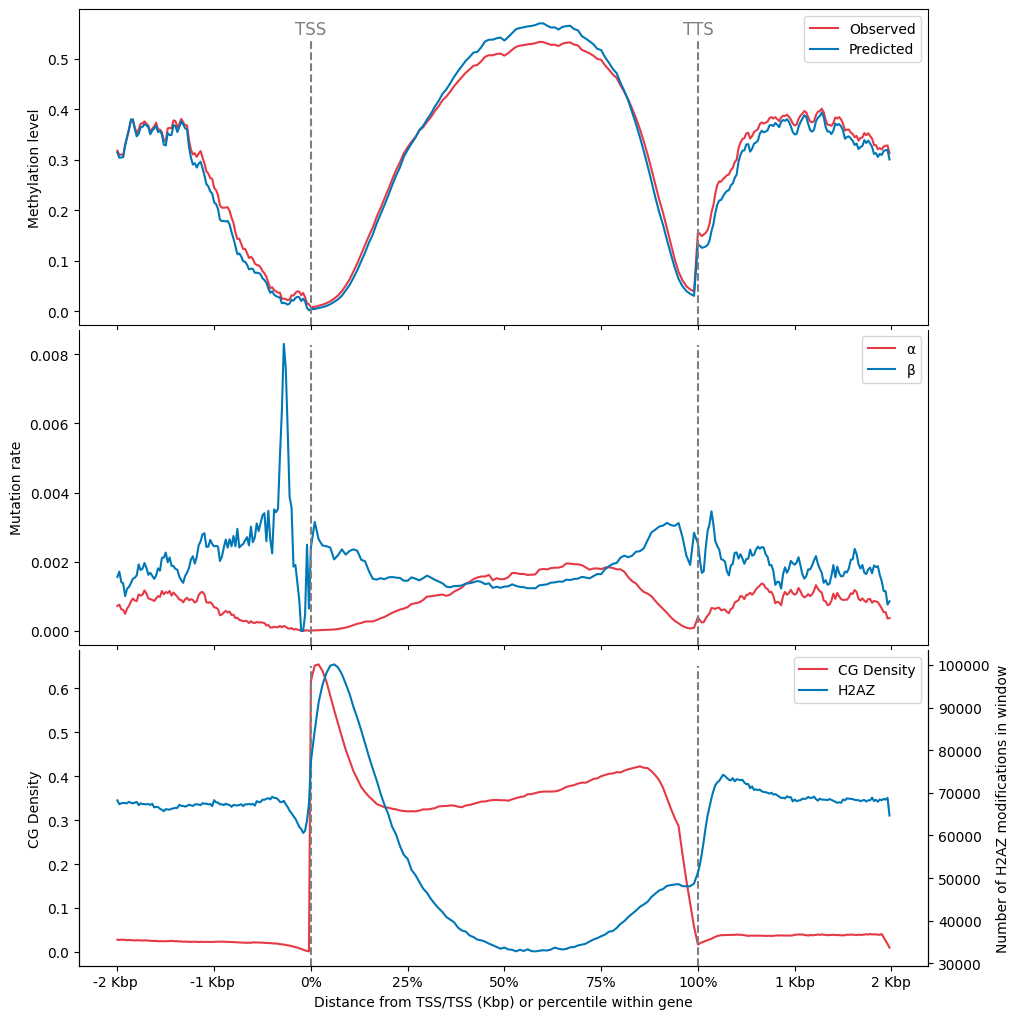

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1 ,sharex=True, figsize=(10,10)) 
ax4 = ax3.twinx() # instantiate a second axes that shares the same x-axis for H2AZ

r = "#e63946"
b = "#0077b6"

ax1.plot(x, obs, r, x, pred, b)
ax2.plot(x, alpha, r, x, beta, b)
c, = ax3.plot(x, cg_density, r, label='CG Density')
h, = ax4.plot(x, h2az_compressed, b, label='H2AZ')

def format_tick(x, pos): 
    if x < 0: 
        return f'{(x //250):.0f} Kbp '
    elif x <= 1000:
        return f'{(x/10):.0f}%'
    else:
        return f'{((x -1000) // 250):.0f} Kbp'
    
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_tick))
ax1.axvline(x=1,ymax=0.9, color='C7', linestyle='--')
ax1.axvline(x=1001, ymax=0.9,color='C7', linestyle='--')
ax1.annotate("TSS", xy=(0,0), xytext=(-40, 0.55),  color='C7', fontsize=12)
ax1.annotate("TTS", xy=(100,0), xytext=(962, 0.55),  color='C7', fontsize=12)
ax1.legend(['Observed', 'Predicted'], loc='upper right')
ax1.set_ylabel('Methylation level')



ax2.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax2.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax2.legend(['α', 'β'], loc='upper right')
ax2.set_ylabel("Mutation rate")

ax3.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax3.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax3.legend([c,h],['CG Density', "H2AZ"], loc='upper right')
ax3.set_ylabel("CG Density")
ax3.set_xlabel('Distance from TSS/TSS (Kbp) or percentile within gene')
ax4.set_ylabel("Number of H2AZ modifications in window")


fig.tight_layout(pad=0)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines["top"].set_visible(False)



# plt.savefig("3.png", dpi=450)
plt.show()



Figure 4

- Comparison of wt, cmt3 and suv 

- Observed
- Alpha
- Beta

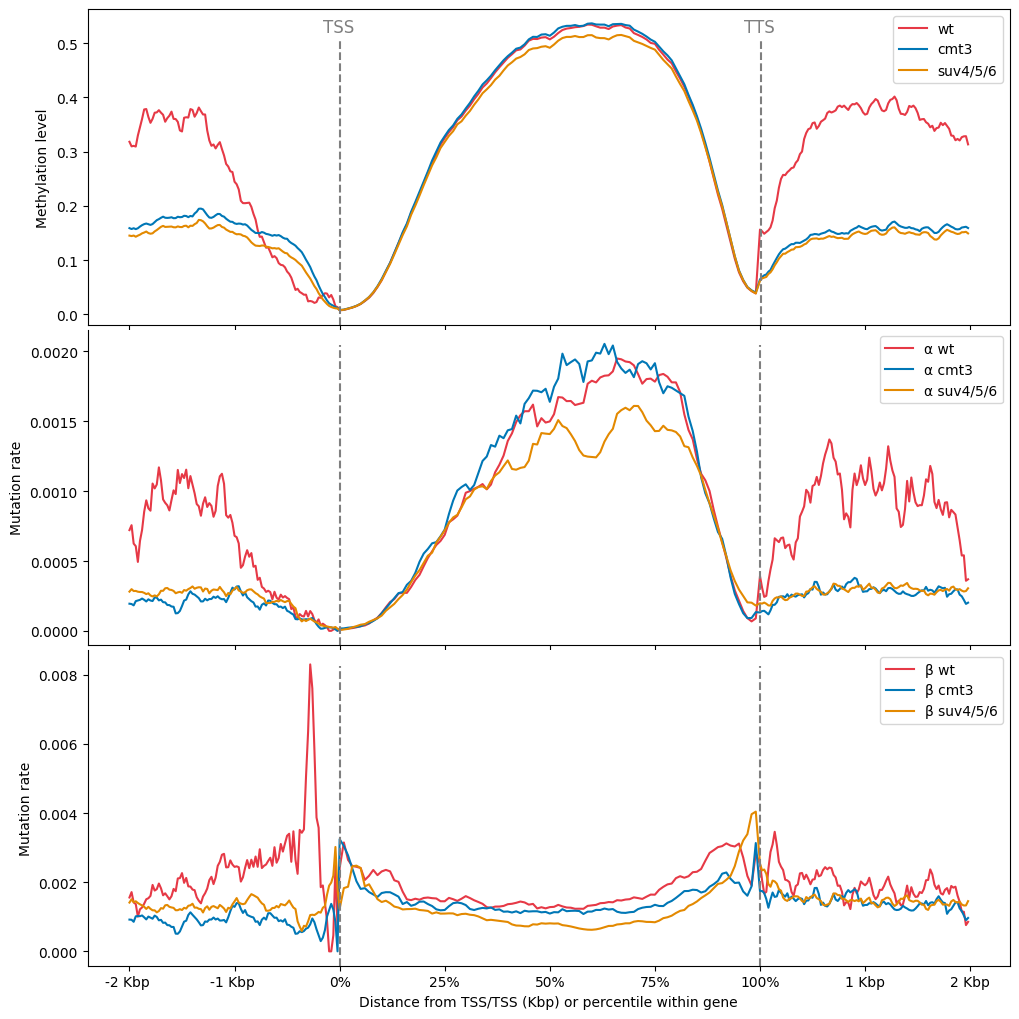

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1 ,sharex=True, figsize=(10,10)) 

r = "#e63946"
b = "#0077b6"
o = "#e38900"


cmt_obs = cmt3[:, cmt3_headers.index('Observed Steady State')]
suv_obs = suv[:, suv_headers.index('Observed Steady State')]

cmt_alpha = cmt3[:, cmt3_headers.index('Alpha')]
cmt_beta = cmt3[:, cmt3_headers.index('Beta')]

suv_alpha = suv[:, suv_headers.index('Alpha')]
suv_beta = suv[:, suv_headers.index('Beta')]


def format_tick(x, pos): 
    if x < 0: 
        return f'{(x //250):.0f} Kbp '
    elif x <= 1000:
        return f'{(x/10):.0f}%'
    else:
        return f'{((x -1000) // 250):.0f} Kbp'
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    
ax1.plot(x, obs, r, x, cmt_obs, b, x, suv_obs, o)
ax1.axvline(x=2,ymax=0.9, color='C7', linestyle='--')
ax1.axvline(x=1002, ymax=0.9,color='C7', linestyle='--')
ax1.annotate("TSS", xy=(0,0), xytext=(-40, 0.52),  color='C7', fontsize=12)
ax1.annotate("TTS", xy=(100,0), xytext=(962, 0.52),  color='C7', fontsize=12)
ax1.legend(['wt', 'cmt3', "suv4/5/6"], loc='upper right')
ax1.set_ylabel('Methylation level')



ax2.plot(x, alpha, r, x, cmt_alpha, b, x, suv_alpha, o)
ax2.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax2.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax2.legend(['α wt', 'α cmt3' , "α suv4/5/6"], loc='upper right')
ax2.set_ylabel("Mutation rate")

ax3.plot(x, beta, r, x, cmt_beta, b, x, suv_beta, o)
ax3.axvline(x=1,ymax=0.95, color='C7', linestyle='--')
ax3.axvline(x=1001, ymax=0.95,color='C7', linestyle='--')
ax3.legend(['β wt', "β cmt3", "β suv4/5/6"], loc='upper right')
ax3.set_ylabel("Mutation rate")
ax3.set_xlabel('Distance from TSS/TSS (Kbp) or percentile within gene')
ax4.set_ylabel("Number of H2AZ modifications in window")


fig.tight_layout(pad=0)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines["top"].set_visible(False)



# plt.savefig("4.png", dpi=450)
plt.show()

